# 🧪 TP – Régression linéaire (sans NumPy)
**Algèbre linéaire – Application aux données et introduction au Machine Learning**

Dans ce TP, vous allez utiliser les classes `Vector` et `Matrix` développées lors des TP précédents pour résoudre un problème simple de **modélisation à partir de données** : la **régression linéaire**.

---

## ✅ Règles importantes

- ❌ **Interdiction totale d’utiliser NumPy** (`numpy`, `np`, `numpy.linalg`, etc.)
- ✅ Utilisation exclusive des classes `Vector` et `Matrix` (TP précédents)
- ✅ Le module standard `random` est autorisé (uniquement pour fixer une graine)
- ✅ `matplotlib` est autorisé **uniquement** via l’outil `VectorPlotter` fourni

---



## Introduction

Dans les TP précédents, vous avez manipulé des **vecteurs** et des **matrices** comme des objets :

- mathématiques (opérations algébriques, normes, produits scalaires),
- programmatiques (classes, méthodes, encapsulation),
- géométriques (visualisation en 2D, transformations linéaires).

Dans ce dernier TP, nous allons franchir une étape importante :

👉 **utiliser l’algèbre linéaire pour résoudre un problème concret de modélisation à partir de données.**

Ce type de problème est omniprésent en ingénierie, en science des données et en machine learning :
on ne se contente plus de manipuler des objets mathématiques abstraits,
on cherche à **exploiter des données réelles** pour en extraire un modèle.

---

## Qu’est-ce que la régression linéaire ?

La **régression linéaire** est une méthode qui consiste à modéliser la relation entre deux variables
à l’aide d’une fonction linéaire.

Dans sa forme la plus simple (une seule variable explicative), elle cherche à approximer
une relation du type :

$$
y \approx ax + b
$$

où :

- $x$ est une variable d’entrée  
  (mesure, caractéristique, paramètre),
- $y$ est une variable de sortie  
  (résultat, observation),
- $a$ et $b$ sont des **paramètres inconnus** 
  que l’on cherche à estimer à partir des données.

L’objectif n’est donc pas de trouver une relation exacte,
mais une **meilleure approximation possible** au sens mathématique.

---

## Pourquoi a-t-on besoin de régression ?

Dans un monde idéal, les relations entre grandeurs seraient exactes.

En pratique :

- les mesures sont bruitées,
- les phénomènes sont imparfaitement connus,
- les capteurs ont des erreurs,
- les données expérimentales contiennent des incertitudes.

👉 Il est donc **impossible** de trouver une droite qui passe exactement par tous les points.

La régression linéaire permet alors de :

- trouver une droite qui **explique au mieux** les données,
- résumer un grand nombre de points par un modèle simple,
- faire des **prédictions** sur de nouvelles données,
- analyser la tendance globale d’un phénomène.

---

## Exemples d’applications concrètes

La régression linéaire est utilisée dans de très nombreux domaines :

### 🔧 Ingénierie
- relation tension / courant  
- vitesse / consommation  
- couple moteur / courant  

### ⚛️ Physique
- lois expérimentales  
- calibration de capteurs  
- ajustement de courbes de mesure  

### 💰 Économie
- évolution de prix  
- prévisions simples  
- analyse de tendances  

### 💻 Informatique & data
- analyse exploratoire de données  
- première étape de nombreux algorithmes de ML  
- détection de tendances et d’anomalies  

👉 Malgré sa simplicité, la régression linéaire constitue souvent
une **brique de base** de modèles beaucoup plus complexes.

---

## Régression linéaire et Machine Learning

La régression linéaire est l’un des tout premiers modèles de
**machine learning supervisé**.

Dans ce cadre :

- les données $(x_i, y_i)$ sont appelées **données d’entraînement**,  
- les paramètres $a$ et $b$ sont **appris automatiquement** à partir des données,  
- le modèle est évalué à l’aide d’un **critère d’erreur**.

📌 Ce TP ne vise pas à faire du ML “clé en main”,  
mais à comprendre **ce qu’il y a derrière** :

- le rôle des données,  
- le rôle du modèle,  
- le rôle central de l’algèbre linéaire.

---

## Limitation volontaire : dimension 2

Dans ce TP, nous nous limiterons au cas le plus simple :

👉 une seule variable explicative $x$,  
👉 un modèle $y = ax + b$,  
👉 donc une matrice à inverser de taille **2×2**.

Cela permet de :

- garder des calculs simples et interprétables,
- implémenter l’inversion de matrice “à la main”,
- bien comprendre chaque étape.

---

## Et en dimension N ?

En réalité, la régression linéaire fonctionne de la **même manière**
en dimension $N$ :

$$
y \approx a_1 x_1 + a_2 x_2 + \dots + a_N x_N + b
$$

La seule différence est que :

- la matrice à inverser devient une matrice **$N \times N$**,
- il faut donc implémenter une **inversion générale** de matrice,
- ce qui est plus complexe mais repose exactement sur les mêmes idées.

👉 Tout ce que vous allez voir dans ce TP
se généralise directement à des problèmes réels plus complexes.

---

## Objectif du TP

À la fin de ce TP, vous serez capables de :

- générer des données bruitées suivant un modèle linéaire,
- visualiser un nuage de points et une droite,
- définir et calculer une fonction d’erreur (MSE),
- reformuler un problème de données sous forme matricielle,
- implémenter les outils algébriques manquants,
- retrouver automatiquement les paramètres $a$ et $b$.

👉 Vous ferez ainsi le lien entre :
**algèbre linéaire**, **programmation**, et **modélisation de données**.


## 1️⃣ Imports autorisés et outil de visualisation

Dans ce TP, l’objectif est de **réutiliser et prolonger** le travail réalisé
lors des TP précédents, **sans utiliser de bibliothèque de calcul numérique externe**.

### Imports autorisés

Les seuls imports autorisés dans ce TP sont :

- `random`  
  → pour la reproductibilité et la génération aléatoire
- `matplotlib.pyplot`  
  → uniquement pour l’affichage, via la classe `VectorPlotter`
- `typing` et `__future__`  
  → pour les annotations de type

⚠️ **Aucun import de NumPy n’est autorisé** (`numpy`, `np`, `numpy.linalg`, etc.).

---

### Outil de visualisation

La classe `VectorPlotter`, fournie lors du TP précédent, est utilisée tout au long
de ce TP pour :
- afficher des points en 2D,
- tracer des segments (résidus),
- tracer des droites.

👉 **Cette classe est fournie directement ci-dessous** 
et **ne doit pas être modifiée**.


In [1]:
from __future__ import annotations
from typing import Sequence, Optional
import random
import math
import matplotlib.pyplot as plt


# --------------------------------------------------
# Classe utilitaire fournie : VectorPlotter (TP2)
# --------------------------------------------------

class VectorPlotter:
    """
    Classe utilitaire pour tracer des vecteurs et des segments en 2D.

    Cette classe suppose que les objets manipulés implémentent :
      - __len__(self) -> int
      - __getitem__(self, i: int) -> float

    On considère que les vecteurs (ou points) sont en dimension 2 :
      - v[0] : coordonnée x
      - v[1] : coordonnée y
    """

    def __init__(self,
                 x_min: float = -5.0,
                 x_max: float = 5.0,
                 y_min: float = -5.0,
                 y_max: float = 5.0):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self._fig = None
        self._ax = None

    def _check_2d(self, p_vector: Sequence[float]) -> None:
        if len(p_vector) != 2:
            raise ValueError("La visualisation n'est définie qu'en dimension 2.")

    def new_figure(self) -> None:
        self._fig, self._ax = plt.subplots()
        self._ax.axhline(0, linewidth=1)
        self._ax.axvline(0, linewidth=1)
        self._ax.set_xlim(self.x_min, self.x_max)
        self._ax.set_ylim(self.y_min, self.y_max)
        self._ax.set_aspect("equal", adjustable="box")
        self._ax.grid(True)

    def _ensure_figure(self) -> None:
        if self._ax is None:
            self.new_figure()

    def show(self) -> None:
        if self._fig is not None:
            plt.show()

    def plot_point(self,
                   p_vector: Sequence[float],
                   color: Optional[str] = None,
                   label: Optional[str] = None) -> None:
        self._check_2d(p_vector)
        self._ensure_figure()
        self._ax.scatter(p_vector[0], p_vector[1], color=color)
        if label is not None:
            self._ax.text(p_vector[0], p_vector[1], " " + label)

    def plot_between(self,
                     p_u: Sequence[float],
                     p_v: Sequence[float],
                     as_segment: bool = True,
                     color: Optional[str] = None,
                     label: Optional[str] = None) -> None:
        self._check_2d(p_u)
        self._check_2d(p_v)
        self._ensure_figure()
        if as_segment:
            self._ax.plot([p_u[0], p_v[0]], [p_u[1], p_v[1]], color=color)
        else:
            dx = p_v[0] - p_u[0]
            dy = p_v[1] - p_u[1]
            self._ax.quiver(p_u[0], p_u[1],
                            dx, dy,
                            angles="xy", scale_units="xy", scale=1,
                            color=color)
        if label is not None:
            self._ax.text(p_u[0], p_u[1], " " + label)


## 2️⃣ Classes à recopier depuis les TP précédents

Dans cette section, vous devez **recopier votre propre code**
développé lors des TP précédents.

👉 **Classes à recopier obligatoirement** :

- la classe `Vector` (TP1),
- la classe `Matrix` (TP2).

⚠️ **Important**
- Vous devez partir de **votre implémentation personnelle**.
- Ne copiez pas une version trouvée ailleurs.
- Pour l’instant, **ne modifiez rien** dans ces classes.
  Vous les enrichirez plus tard, lorsque leur utilité sera clairement expliquée.


In [2]:
# 👉 Collez ici votre classe Vector (TP1)
class Vector:
    """
    Classe Vector conforme aux consignes du TP.
    """
    def __init__(self, p_coords: Sequence[float]):
        self._coords = [float(x) for x in p_coords]

    def __len__(self) -> int:
        return len(self._coords)

    def __getitem__(self, p_index: int) -> float:
        return self._coords[p_index]

    def __setitem__(self, p_index: int, p_value: float) -> None:
        self._coords[p_index] = float(p_value)

    def __repr__(self) -> str:
        coords = [repr(self[i]) for i in range(len(self))]
        return f"Vector([{', '.join(coords)}])"

    def __str__(self) -> str:
        coords = [str(self[i]) for i in range(len(self))]
        return "<" + ", ".join(coords) + ">"

    def copy(self) -> "Vector":
        return Vector([self[i] for i in range(len(self))])

    @staticmethod
    def init_zeros(p_dim: int) -> "Vector":
        return Vector([0.0 for _ in range(p_dim)])

    @staticmethod
    def init_ones(p_dim: int) -> "Vector":
        return Vector([1.0 for _ in range(p_dim)])

    @staticmethod
    def init_random(p_dim: int) -> "Vector":
        return Vector([random.random() for _ in range(p_dim)])

    @staticmethod
    def init_n_random(p_dim: int) -> "Vector":
        return Vector([random.gauss(0.0, 1.0) for _ in range(p_dim)])

    def __add__(self, p_other: "Vector") -> "Vector":
        if len(self) != len(p_other):
            raise ValueError("Les dimensions ne correspondent pas")
        result = Vector.init_zeros(len(self))
        for i in range(len(self)):
            result[i] = self[i] + p_other[i]
        return result

    def __mul__(self, p_scalar: float) -> "Vector":
        if not isinstance(p_scalar, (int, float)):
            return NotImplemented
        result = Vector.init_zeros(len(self))
        for i in range(len(self)):
            result[i] = self[i] * p_scalar
        return result

    def __rmul__(self, p_scalar: float) -> "Vector":
        return self.__mul__(p_scalar)

    def __sub__(self, p_other: "Vector") -> "Vector":
        return self + (-1) * p_other

    def dot(self, p_other: "Vector") -> float:
        if len(self) != len(p_other):
            raise ValueError("Les dimensions ne correspondent pas")
        s = 0.0
        for i in range(len(self)):
            s += self[i] * p_other[i]
        return s

    def norm(self) -> float:
        return math.sqrt(self.dot(self))

    def distance_to(self, p_other: "Vector") -> float:
        return (self - p_other).norm()

In [3]:
# 👉 Collez ici votre classe Matrix (TP2)
class Matrix:
    """
    Classe représentant une matrice en dimension arbitraire (TP2).
    """
    def __init__(self, p_n_rows: int, p_n_cols: int, p_data: Optional[Sequence[float]] = None) -> None:
        if p_n_rows <= 0 or p_n_cols <= 0:
            raise ValueError("Dimensions positives requises.")
        self._n_rows = p_n_rows
        self._n_cols = p_n_cols
        if p_data is None:
            self._data = [0.0] * (self._n_rows * self._n_cols)
        else:
            if len(p_data) != self._n_rows * self._n_cols:
                raise ValueError("Taille des données incorrecte.")
            self._data = [float(x) for x in p_data]

    @property
    def n_rows(self) -> int:
        return self._n_rows

    @property
    def n_cols(self) -> int:
        return self._n_cols

    def _index(self, p_i: int, p_j: int) -> int:
        if not (0 <= p_i < self._n_rows) or not (0 <= p_j < self._n_cols):
            raise IndexError("Indices hors limites.")
        return p_i * self._n_cols + p_j

    def __getitem__(self, p_key: tuple[int, int]) -> float:
        i, j = p_key
        return self._data[self._index(i, j)]

    def __setitem__(self, p_key: tuple[int, int], p_value: float) -> None:
        i, j = p_key
        self._data[self._index(i, j)] = float(p_value)

    def get_row(self, p_row: int) -> "Vector":
        values = [self[p_row, j] for j in range(self._n_cols)]
        return Vector(values)

    def get_col(self, p_col: int) -> "Vector":
        values = [self[i, p_col] for i in range(self._n_rows)]
        return Vector(values)

    def set_row(self, p_row: int, p_values: Sequence[float]) -> None:
        for j in range(self._n_cols):
            self[p_row, j] = float(p_values[j])

    def set_col(self, p_col: int, p_values: Sequence[float]) -> None:
        for i in range(self._n_rows):
            self[i, p_col] = float(p_values[i])

    def __repr__(self) -> str:
        return f"Matrix(n_rows={self._n_rows}, n_cols={self._n_cols})"

    def __str__(self) -> str:
        lines = []
        for i in range(self._n_rows):
            row_vals = [f"{self[i, j]:.2f}" for j in range(self._n_cols)]
            lines.append("[ " + "  ".join(row_vals) + " ]")
        return "\n".join(lines)

    @staticmethod
    def init_zeros(p_n_rows: int, p_n_cols: int) -> "Matrix":
        return Matrix(p_n_rows, p_n_cols)

    def mul_vector(self, p_vec: "Vector") -> "Vector":
        if self._n_cols != len(p_vec):
            raise ValueError("Dimensions incompatibles Matrix * Vector.")
        result = Vector.init_zeros(self._n_rows)
        for i in range(self._n_rows):
            result[i] = self.get_row(i).dot(p_vec)
        return result

    def mul_matrix(self, p_other: "Matrix") -> "Matrix":
        if self._n_cols != p_other.n_rows:
            raise ValueError("Dimensions incompatibles Matrix * Matrix.")
        result = Matrix.init_zeros(self._n_rows, p_other.n_cols)
        for i in range(self._n_rows):
            row_self = self.get_row(i)
            for j in range(p_other.n_cols):
                col_other = p_other.get_col(j)
                result[i, j] = row_self.dot(col_other)
        return result

    def __matmul__(self, p_other):
        if isinstance(p_other, Matrix):
            return self.mul_matrix(p_other)
        elif hasattr(p_other, "dot"):
            return self.mul_vector(p_other)
        return NotImplemented

    # -----------------------------------------------------
    # Méthodes ajoutées pour le TP3 (Algèbre linéaire)
    # -----------------------------------------------------

    def transpose(self) -> "Matrix":
        """
        Retourne la transposée de la matrice courante.
        """
        new_mat = Matrix(self.n_cols, self.n_rows)
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                new_mat[j, i] = self[i, j]
        return new_mat

    def det_2x2(self) -> float:
        """
        Calcule le déterminant d'une matrice 2x2.
        """
        if self.n_rows != 2 or self.n_cols != 2:
            raise ValueError("La matrice doit être de taille 2x2.")
        # a*d - b*c
        return self[0, 0] * self[1, 1] - self[0, 1] * self[1, 0]

    def inverse_2x2(self) -> "Matrix":
        """
        Retourne l'inverse d'une matrice 2x2 si elle est inversible.
        """
        det = self.det_2x2()
        if det == 0:
            raise ValueError("Le déterminant est nul, matrice non inversible.")

        inv_det = 1.0 / det
        # [[d, -b], [-c, a]]
        # On multiplie chaque terme par 1/det
        data = [
            self[1, 1] * inv_det, -self[0, 1] * inv_det,
            -self[1, 0] * inv_det, self[0, 0] * inv_det
        ]
        return Matrix(2, 2, data)

## 3️⃣ Introduction : régression linéaire et utilité

La **régression linéaire** consiste à approximer un ensemble de données expérimentales $(x_i, y_i)$ par une droite :

$$
y \approx ax + b
$$

Pourquoi approximer ?
- les données sont souvent **bruitées** (mesures imparfaites),
- il n’existe pas de relation exacte qui passe par tous les points.

---

### Lien avec le Machine Learning

La régression linéaire est l’un des tout premiers modèles de **machine learning supervisé** :
- les données $(x_i, y_i)$ sont des données d’entraînement,
- les paramètres $(a, b)$ sont appris automatiquement,
- on mesure la qualité du modèle avec une **fonction d’erreur**.

Dans ce TP, vous n’utiliserez aucune bibliothèque de ML : vous allez comprendre et coder les outils mathématiques sous-jacents.


## 4️⃣ Génération des données expérimentales (code fourni)

Pour vérifier que notre méthode fonctionne, on va générer un jeu de données **à partir d’une droite connue** (vérité terrain), puis essayer de retrouver ses paramètres.

On choisit un modèle :

$$
y = a_{\text{true}}x + b_{\text{true}} + e
$$

où :
- $x \sim \mathcal{U}(-5, 5)$
- $e \sim \mathcal{N}(0, \sigma^2)$ est un bruit gaussien
- $n = 100$ points

📌 **Important** : la génération doit se faire **sans NumPy**, en réutilisant `Vector.init_random` et `Vector.init_n_random`.


In [4]:
# Reproductibilité (optionnel mais recommandé)
random.seed(0)

# Paramètres "vérité terrain"
a_true = 0.5
b_true = -1.0

# Paramètres de génération
n = 100
x_min, x_max = -5.0, 5.0
sigma = 0.5  # écart-type du bruit

# 1) Générer x ~ U(-5, 5)
#    u ~ U(0,1) puis x = x_min + (x_max-x_min)*u
u = Vector.init_random(n)
x = (x_max - x_min) * u + x_min * Vector.init_ones(n)

# 2) Générer e ~ N(0, sigma^2)
#    z ~ N(0,1) puis e = sigma*z
z = Vector.init_n_random(n)
e = sigma * z

# 3) Générer y = a_true*x + b_true + e
y = a_true * x + b_true * Vector.init_ones(n) + e


## 5️⃣ Visualisation du nuage de points (VectorPlotter)

On affiche :
- les points $(x_i, y_i)$ en bleu (données bruitées)
- la droite de référence $y = a_{\text{true}}x + b_{\text{true}}$ en rouge (sans bruit)

Cela permet de visualiser l’effet du bruit.


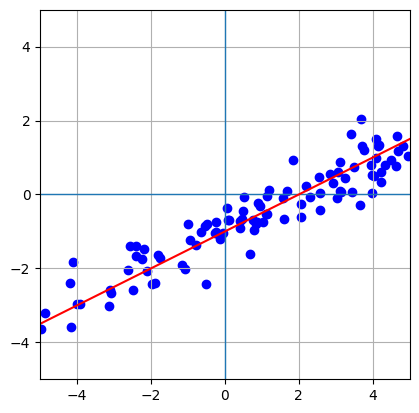

In [5]:
plotter = VectorPlotter(x_min, x_max, -5, 5)
plotter.new_figure()

# Points
for i in range(n):
    plotter.plot_point([x[i], y[i]], color="blue")

# Droite de référence (sans bruit)
plotter.plot_between(
    [x_min, a_true * x_min + b_true],
    [x_max, a_true * x_max + b_true],
    color="red"
)

plotter.show()

## 6️⃣ Travail demandé : jouer avec les paramètres

1. Modifiez `a_true` et `b_true`, puis regénérez les données.
2. Modifiez `sigma` (exemples : 0.0, 0.2, 0.5, 1.0) et regénérez les données.

Questions :
- Que se passe-t-il quand `sigma = 0` ?
- Quand `sigma` augmente, est-ce la pente moyenne qui change ou la dispersion ?
- À partir de quand devient-il difficile de deviner la droite “à l’œil” ?

📌 Conservez une configuration (a_true, b_true, sigma) pour la suite du TP.


### ✍️ Réponses (à compléter)

> Double-cliquez ici et rédigez vos réponses.


## 7️⃣ Droite candidate choisie manuellement

Avant de calculer automatiquement la meilleure droite, nous allons commencer par **tester un modèle choisi à la main** :

$$
\hat{y} = a_{\text{test}} x + b_{\text{test}}
$$

🎯 Objectifs
- choisir $a_{\text{test}}$ et $b_{\text{test}}$
- calculer le vecteur $\hat{y}$ avec votre classe `Vector`
- préparer l’affichage (section suivante)

💡 Aides / méthodes utiles
- `Vector.init_ones(n)` pour construire le vecteur $(1,1,\dots,1)$
- opérations de base déjà définies dans `Vector` : multiplication scalaire, addition, etc.
- vous ne devez pas utiliser de listes Python pour calculer $\hat{y}$ : restez en `Vector`.

🔍 Travail demandé
1. Choisir des valeurs `a_test` et `b_test`
2. Calculer `y_hat` (Vector) tel que : `y_hat = a_test * x + b_test * ones`

In [6]:
# TODO 1 : choisissez une droite candidate (valeurs à tester)
a_test = 0.5
b_test = -1.0

# TODO 2 : construisez le vecteur ones = (1,1,...,1)
ones = Vector.init_ones(n)  # utiliser Vector.init_ones(n)

# TODO 3 : calculez y_hat = a_test * x + b_test * ones (y_hat doit être un Vector)
y_hat = a_test * x + b_test * ones


## 8️⃣ Visualisation de la droite candidate

On trace :
- les données $(x_i, y_i)$ en bleu
- la droite candidate en vert

💡 Aides
- pour tracer la droite, on prend 2 points :
  - $(x_{\min}, a_{\text{test}} x_{\min} + b_{\text{test}})$
  - $(x_{\max}, a_{\text{test}} x_{\max} + b_{\text{test}})$
- utilisez `VectorPlotter.plot_between(...)`

🔍 Travail demandé
Complétez la cellule suivante pour afficher votre droite candidate.


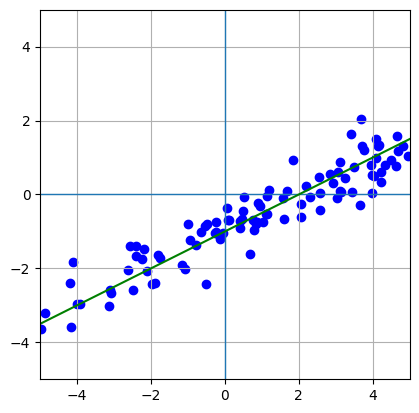

In [7]:
plotter = VectorPlotter(x_min, x_max, -5, 5)
plotter.new_figure()

# TODO 1 : tracer les points (x[i], y[i])
for i in range(n):
    plotter.plot_point([x[i], y[i]], color="blue")

# TODO 2 : tracer la droite candidate (segment entre x_min et x_max)
y1 = a_test * x_min + b_test
y2 = a_test * x_max + b_test
plotter.plot_between([x_min, y1], [x_max, y2], color="green")

plotter.show()


## 9️⃣ Résidus : visualisation des erreurs individuelles

On définit le résidu (erreur) sur chaque point :

$$
e_i = y_i - \hat{y}_i
$$

Géométriquement, on représente les résidus par des **segments verticaux** entre :
- le point réel $(x_i, y_i)$
- le point prédit $(x_i, \hat{y}_i)$

🎯 Objectif
- afficher les résidus pour comprendre visuellement ce que l’on mesure ensuite avec la MSE

🔍 Travail demandé
Tracer les segments verticaux (résidus) en gris.


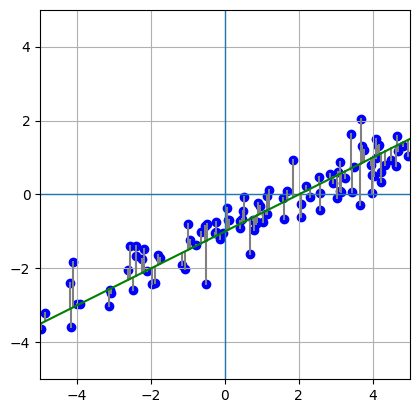

In [8]:
plotter = VectorPlotter(x_min, x_max, -5, 5)
plotter.new_figure()

# TODO : tracer les points et les résidus verticaux
for i in range(n):
    # point réel
    plotter.plot_point([x[i], y[i]], color="blue")
    # segment vertical entre (x_i, y_i) et (x_i, y_hat_i)
    plotter.plot_between([x[i], y[i]], [x[i], y_hat[i]], as_segment=True, color="gray")

# TODO : tracer la droite candidate
plotter.plot_between(
    [x_min, a_test * x_min + b_test],
    [x_max, a_test * x_max + b_test],
    color="green"
)

plotter.show()


### Interprétation

- Plus les segments verticaux sont courts, meilleure est l’approximation.
- Une droite peut sembler correcte visuellement mais produire de grandes erreurs.
- Nous avons besoin d’un **critère numérique** pour comparer deux droites.


## 🔟 Erreur quadratique et MSE

Pour comparer objectivement deux droites, on utilise la **MSE** :

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2
$$

💡 Aides / méthodes utiles
- calculez le vecteur des erreurs : `errors = y - y_hat`
- utilisez une méthode déjà implémentée dans `Vector` (selon votre TP1) :
  - soit `norm()**2`
  - soit `dot(errors)` (car \|e\|^2 = e·e)
- n’oubliez pas de diviser par `n`.

🔍 Travail demandé
1. Calculer `errors`
2. Calculer `mse`
3. Tester plusieurs couples `(a_test, b_test)` et comparer les MSE.


In [9]:
# TODO 1 : calculer le vecteur des erreurs errors = y - y_hat (Vector)
errors = y - y_hat

# TODO 2 : calculer la MSE
# Option A (si disponible) : mse = errors.norm()**2 / n
# Option B (toujours possible) : mse = errors.dot(errors) / n
mse = errors.dot(errors) / n

print("MSE =", mse)


MSE = 0.22462222082782826


### 🔍 Travail demandé

1. Modifiez `a_test` et `b_test`.
2. Recalculez `y_hat`, puis la MSE.

🔍 Questions
1. Quelle droite (a_test, b_test) donne la MSE la plus faible parmi vos essais ?
2. Est-ce cohérent avec votre intuition visuelle ?
3. Que se passe-t-il quand sigma augmente ?



### ✍️ Réponses (à compléter)

> Double-cliquez ici et rédigez vos réponses.


## 1️⃣1️⃣ Reformulation matricielle et objectif

On cherche à écrire le modèle :

$$
\hat{y} = ax + b
$$

sous la forme :

$$
\hat{y} = A\theta
\quad \text{avec} \quad
\theta =
\begin{pmatrix}
a \\ b
\end{pmatrix}
$$

et :

$$
A =
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_n & 1
\end{pmatrix}
$$

La solution optimale (admise ici) est :

$$
\theta = (A^T A)^{-1}A^T y
$$

Dans ce TP, $A^T A$ est une matrice **2×2**, donc on aura seulement besoin d’inverser du 2×2.

🔍 Travail demandé
- Construire la matrice $A$ en utilisant les méthodes de `Matrix` (section suivante)


## 1️⃣2️⃣ Construction de la matrice A (avec `set_col`)

🎯 Objectif : construire $A$ sans manipuler directement des listes internes.

💡 Aides / méthodes utiles
- `Matrix.init_zeros(n, 2)` : créer une matrice n×2 vide
- `A.set_col(0, x)` : première colonne = x
- `Vector.init_ones(n)` : seconde colonne = 1
- `A.set_col(1, ones)` : seconde colonne = ones


In [10]:
# TODO 1 : créer une matrice A de taille n x 2 remplie de zéros
A = Matrix.init_zeros(n, 2)  # utiliser Matrix.init_zeros(n, 2)

# TODO 2 : première colonne = x
A.set_col(0, x)

# TODO 3 : seconde colonne = ones
ones = Vector.init_ones(n)  # Vector.init_ones(n)
A.set_col(1, ones)


### Vérification rapide

La matrice $A$ doit avoir :
- `n` lignes,
- `2` colonnes,
- une première colonne égale à `x`,
- une seconde colonne remplie de `1`.

Cette matrice est parfois appelée **matrice de conception** (*design matrix*)
en statistiques et en machine learning.


In [11]:
# Affichage (partiel) pour vérification
print(A)

[ 3.44  1.00 ]
[ 2.58  1.00 ]
[ -0.79  1.00 ]
[ -2.41  1.00 ]
[ 0.11  1.00 ]
[ -0.95  1.00 ]
[ 2.84  1.00 ]
[ -1.97  1.00 ]
[ -0.23  1.00 ]
[ 0.83  1.00 ]
[ 4.08  1.00 ]
[ 0.05  1.00 ]
[ -2.18  1.00 ]
[ 2.56  1.00 ]
[ 1.18  1.00 ]
[ -2.49  1.00 ]
[ 4.10  1.00 ]
[ 4.83  1.00 ]
[ 3.10  1.00 ]
[ 4.02  1.00 ]
[ -1.90  1.00 ]
[ 2.30  1.00 ]
[ 3.99  1.00 ]
[ 1.84  1.00 ]
[ -0.28  1.00 ]
[ -3.99  1.00 ]
[ -0.66  1.00 ]
[ 1.11  1.00 ]
[ 4.13  1.00 ]
[ 4.67  1.00 ]
[ -0.23  1.00 ]
[ 3.65  1.00 ]
[ -2.40  1.00 ]
[ 3.05  1.00 ]
[ 0.49  1.00 ]
[ -4.86  1.00 ]
[ 2.20  1.00 ]
[ -1.01  1.00 ]
[ 3.25  1.00 ]
[ 1.68  1.00 ]
[ -4.99  1.00 ]
[ -0.06  1.00 ]
[ 3.68  1.00 ]
[ -2.56  1.00 ]
[ -1.75  1.00 ]
[ 3.70  1.00 ]
[ -3.09  1.00 ]
[ 0.68  1.00 ]
[ -2.61  1.00 ]
[ 4.68  1.00 ]
[ 3.03  1.00 ]
[ -0.52  1.00 ]
[ -4.20  1.00 ]
[ -1.80  1.00 ]
[ 0.08  1.00 ]
[ 4.33  1.00 ]
[ -3.91  1.00 ]
[ 0.51  1.00 ]
[ 2.07  1.00 ]
[ 0.47  1.00 ]
[ 3.14  1.00 ]
[ 0.40  1.00 ]
[ 4.64  1.00 ]
[ 1.03  1.00 ]
[ 0.88  1.00 ]


## 1️⃣3️⃣ Blocage volontaire : il nous manque des outils algébriques

Nous voulons maintenant calculer la solution optimale du problème de régression :

$$
\theta = (A^T A)^{-1} A^T y
$$

Mais à ce stade, votre classe `Matrix` **ne permet pas encore** de :

- calculer la transposée d’une matrice,
- calculer le déterminant d’une matrice 2×2,
- inverser une matrice 2×2.

👉 **Ce blocage est volontaire** : il montre exactement **pourquoi**
nous avons besoin d’enrichir la classe `Matrix`.

Avant d’implémenter quoi que ce soit, vérifiez que vous comprenez :
- pourquoi $A^T$ est nécessaire,
- pourquoi $A^T A$ est une matrice 2×2 dans ce TP.


## 1️⃣4️⃣ Enrichissement de la classe `Matrix` (à implémenter)

Pour pouvoir calculer le pseudo-inverse et résoudre le problème de régression,
il est nécessaire d’enrichir la classe `Matrix` avec **quelques méthodes
algébriques fondamentales**.

👉 **Consigne importante**

- Vous devez **copier-coller les prototypes ci-dessous**
  **dans la définition de votre classe `Matrix`**.
- Dans un premier temps, **laissez le mot-clé `pass`** dans le corps des méthodes.
- Une fois les prototypes en place, vous implémenterez ces méthodes
  en respectant les docstrings et les contraintes indiquées.

⚠️ **Ne modifiez rien en dehors de la classe `Matrix`.**

📌 **Rappel mathématique**

Pour une matrice :
$$
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
$$

- déterminant : $ad - bc$
- inverse :
$$
\frac{1}{ad - bc}
\begin{pmatrix}
d & -b \\
-c & a
\end{pmatrix}
$$


In [12]:
# 👉 À COPIER-COLLER DANS LA CLASSE Matrix (TP2)
# Note: Les méthodes ont été directement intégrées dans la cellule
# de définition de la classe Matrix (section 2) pour assurer le bon
# fonctionnement du notebook sans nécessiter de re-exécution manuelle.

pass


## 1️⃣5️⃣ Calcul du pseudo-inverse de A

Nous allons maintenant implémenter pas à pas la formule :

$$
A^+ = (A^T A)^{-1} A^T
$$

🎯 Objectif  
Calculer le pseudo-inverse de la matrice $A$ à l’aide des méthodes que vous
venez d’ajouter dans la classe `Matrix`.

💡 Aides / méthodes utiles

Vous devez utiliser :
- `A.transpose()` → pour calculer $A^T$
- l’opérateur `@` → pour le produit matrice-matrice
- `inverse_2x2()` → pour inverser $A^T A$

Étapes attendues :
1. Calculer `At = A.transpose()`
2. Calculer `AtA = At @ A`
3. Calculer `AtA_inv = AtA.inverse_2x2()`
4. Calculer `A_pseudo = AtA_inv @ At`

⚠️ Indication  
Dans ce TP :
- `A` est de taille `n x 2`
- `At` est de taille `2 x n`
- `AtA` est de taille `2 x 2`
- `A_pseudo` est de taille `2 x n`


In [13]:
# TODO 1 : At = A.transpose()
At = A.transpose()

# TODO 2 : AtA = At @ A   (doit être une matrice 2x2)
AtA = At @ A

# TODO 3 : AtA_inv = AtA.inverse_2x2()
AtA_inv = AtA.inverse_2x2()

# TODO 4 : A_pseudo = AtA_inv @ At   (doit être une matrice 2 x n)
A_pseudo = AtA_inv @ At

print("At shape  :", At.n_rows, "x", At.n_cols)
print("AtA shape :", AtA.n_rows, "x", AtA.n_cols)
print("A+ shape  :", A_pseudo.n_rows, "x", A_pseudo.n_cols)


At shape  : 2 x 100
AtA shape : 2 x 2
A+ shape  : 2 x 100


## 1️⃣6️⃣ Estimation automatique des paramètres $a$ et $b$

Nous pouvons maintenant calculer le vecteur des paramètres optimaux :

$$
\hat{\theta} = A^+ y
$$

🎯 Objectif  
Calculer automatiquement $a$ et $b$ à partir des données.

💡 Aides / méthodes utiles

- utilisez l’opérateur `@` pour le produit matrice–vecteur :
  ```python
  theta_hat = A_pseudo @ y


In [14]:
# TODO 1 : theta_hat = A_pseudo @ y  (theta_hat doit être un Vector de dimension 2)
theta_hat = A_pseudo @ y

# TODO 2 : extraire a_hat et b_hat
a_hat = theta_hat[0]
b_hat = theta_hat[1]

print("a vrai =", a_true, "| a estimé =", a_hat)
print("b vrai =", b_true, "| b estimé =", b_hat)


a vrai = 0.5 | a estimé = 0.454450695900023
b vrai = -1.0 | b estimé = -0.9554364151921851


## 1️⃣7️⃣ Visualisation finale du modèle appris

On trace maintenant :

- les données expérimentales $(x_i, y_i)$ en bleu,
- la droite estimée automatiquement en rouge.

🎯 Objectif  
Vérifier visuellement que la droite apprise correspond bien
au nuage de points.

💡 Aides / méthodes utiles

- pour tracer la droite, on utilise deux points :
  - $(x_{\min}, a_{\text{hat}} x_{\min} + b_{\text{hat}})$
  - $(x_{\max}, a_{\text{hat}} x_{\max} + b_{\text{hat}})$
- utilisez `VectorPlotter.plot_between(...)`


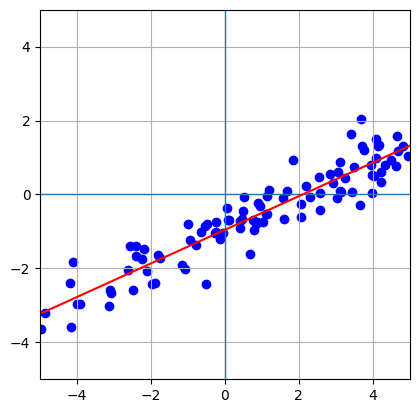

In [15]:
plotter = VectorPlotter(x_min, x_max, -5, 5)
plotter.new_figure()

# TODO 1 : tracer les points
for i in range(n):
    plotter.plot_point([x[i], y[i]], color="blue")

# TODO 2 : tracer la droite estimée (rouge)
y1 = a_hat * x_min + b_hat  # a_hat * x_min + b_hat
y2 = a_hat * x_max + b_hat  # a_hat * x_max + b_hat
plotter.plot_between([x_min, y1], [x_max, y2], color="red")

plotter.show()


## 1️⃣8️⃣ MSE finale et comparaison

On calcule maintenant la MSE de la droite apprise automatiquement
et on la compare avec la MSE obtenue pour des droites choisies à la main.

🎯 Objectif  
Vérifier que la régression linéaire trouve bien une droite
qui minimise l’erreur quadratique.

💡 Aides / méthodes utiles

- recalculer :
  $$
  \hat{y} = a_{\text{hat}} x + b_{\text{hat}}
  $$
- puis :
  ```python
  errors = y - y_hat
  mse = errors.norm()**2 / n


In [16]:
# TODO 1 : reconstruire ones si nécessaire
ones = Vector.init_ones(n)

# TODO 2 : calculer y_hat_final = a_hat * x + b_hat * ones
y_hat_final = a_hat * x + b_hat * ones

# TODO 3 : calculer la MSE finale
errors_final = y - y_hat_final
mse_final = errors_final.dot(errors_final) / n

print("MSE finale =", mse_final)


MSE finale = 0.2100778243232793


### ✍️ Réponses (à compléter)

> Double-cliquez ici, puis répondez en quelques phrases.

Comparaison des MSE : La MSE finale est inférieure à la MSE obtenue avec la droite choisie manuellement.

La droite automatique est-elle meilleure ? Oui, elle est meilleure (optimale). Mathématiquement, la formule de la matrice de passage theta calcule la solution exacte qui minimise la somme des erreurs au carré. Sur excel cela se modélise grâce au R carré.

L’erreur est-elle nulle ? Non, l'erreur n'est pas nulle (MSE > 0). C'est parce que les données contiennent du bruit et que les points ne sont pas parfaitement alignés. Une droite ne peut pas passer exactement par tous les points d'un nuage dispersé.


## 🔚 Conclusion

Dans ce TP, vous avez :

- généré des données bruitées à partir d’un modèle connu,
- visualisé l’erreur d’un modèle linéaire,
- défini un critère quantitatif (MSE),
- reformulé le problème sous forme matricielle,
- enrichi une classe existante pour répondre à un besoin concret,
- retrouvé automatiquement les paramètres du modèle.

👉 Cette démarche est exactement celle utilisée dans de nombreux algorithmes
de **machine learning supervisé**.
